In [22]:
# ----- IMPORTACION DE LIBRERIAS -----
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [23]:
# ----- NOMBRE DE LAS IMAGENES DE PRUEBA -----
foto1 = "carretera.jpg"
foto2 = "image-cell.png"
foto3 = "person_bacteria.jpeg"

# Umbralizacion global

# Umbralización global por el método de Otsu

In [24]:
def umbralizacionOtsu(nombreImg):
     #Se lee la imagen
     imagen = cv2.imread(nombreImg,cv2.IMREAD_GRAYSCALE)

     filas, columnas = imagen.shape
     tamaño  = imagen.size
     #tamaño = 16
     matriz = np.asarray(imagen)
     # matriz = np.array([[0,0,1,1],
     #                    [1,2,2,3],
     #                    [4,4,5,5],
     #                    [5,6,7,7]])
     #filas,columnas = 4,4

     histograma = np.zeros(256, dtype=int)

     # Calcular el histograma manualmente
     for x in range(filas):
          for y in range(columnas):
               valor_pixel = imagen[x, y]
               histograma[valor_pixel] += 1
     Wbg = 0
     Wfg = 0
     Xbg = 0
     Xfg = 0
     media_general = 0
     Vbg = 0
     Vfg = 0
     val1 = []
     val2 = []

     # calcula la media y el promedio de la aparicion
     for x in range(filas):
          for y in range(columnas):
               if(matriz[x,y] > 130):
                    Wbg += 1
                    Xbg += matriz[x,y]
                    val1.append(matriz[x,y])
               else:
                    Wfg += 1
                    Xfg += matriz[x,y]
                    val2.append(matriz[x,y])

          media_general += matriz[x,y]

     # print(arreglo)
     Xbg /= Wbg
     Xfg /= Wfg

     Wbg /= tamaño
     Wfg /= tamaño

     Vbg = np.var(val1)
     Vfg = np.var(val2)

     otsu = Wbg*Vbg + Wfg*Vfg

     print("Otsu: ", otsu)


     for x in range(filas):
          for y in range(columnas):
               if(matriz[x,y] > otsu/255):
                    matriz[x,y] = 255
               else:
                    matriz[x,y] = 0
     
     imagen2 = Image.fromarray(matriz)
     plt.imshow(imagen2) 
     # demostracion de que es correcto
 
umbralizacionOtsu(foto1)

KeyboardInterrupt: 

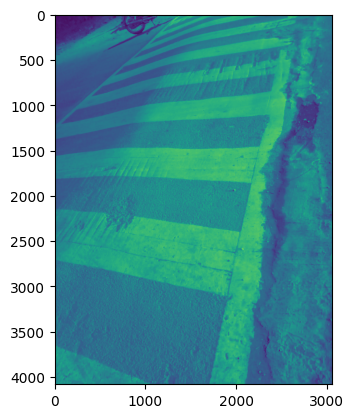

In [ ]:
imagen = cv2.imread(foto1,cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen)

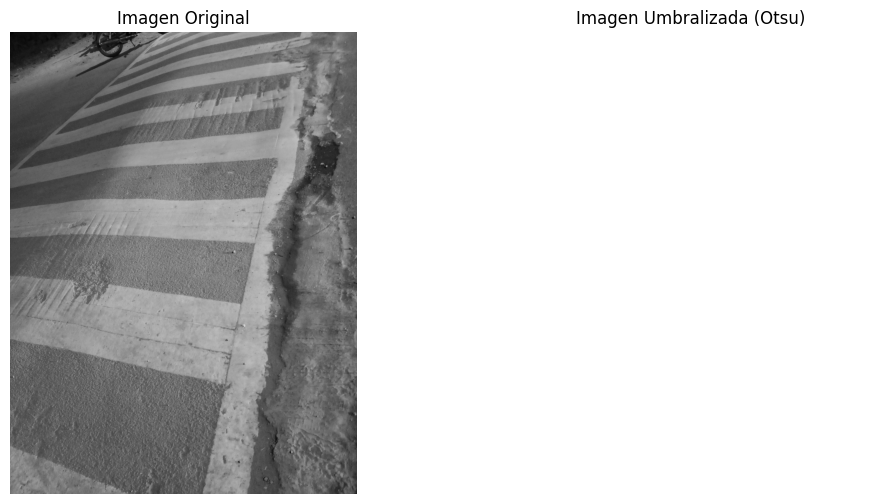

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def umbralizacionOtsu(imagen):
    # Paso 1: Calcular el histograma
    histograma = np.zeros(256)
    filas, columnas = imagen.shape

    # Realiza el histograma de la imagen
    for x in range(filas):
        for y in range(columnas):
            intensidad = imagen[x, y]
            histograma[intensidad] += 1

    # Paso 2: Normalizar el histograma
    histograma = histograma / (filas * columnas)

    var_max = 0
    umbral_optimo = 0

    # proceso para encontrar el umbral óptimo
    for umbral in range(1, 256):
        Wbg = 0
        Wfg = 0
        Xbg = 0
        Xfg = 0
        media_general = 0
        Vbg = 0
        Vfg = 0
        val1 = []
        val2 = []

        # calcula la media y el promedio de la aparicion
        for x in range(1,256):
            if(histograma[x] > umbral_optimo):
                Wbg += 1
                Xbg += histograma[x]
                val1.append(histograma[x])
            else:
                Wfg += 1
                Xfg += histograma[x]
                val2.append(histograma[x])

            media_general += histograma[x]

        if Wbg == 0 or Wfg == 0:
                    continue
        # print(arreglo)
        Xbg /= Wbg
        Xfg /= Wfg

        Wbg /= histograma.size
        Wfg /= histograma.size

        Vbg = np.var(val1)
        Vfg = np.var(val2)

        # Calcular w1, w2
        # w1 = np.sum(histograma[:umbral])    # suma de 0 al umbral
        # w2 = np.sum(histograma[umbral:])    # suma del umbral al final

        

        # Calcular media1, media2
        # media1 = np.sum(np.arange(umbral) * histograma[:umbral]) / w1
        # media2 = np.sum(np.arange(umbral, 256) * histograma[umbral:]) / w2

        # Calcular varianza entre clases
        # var_between = w1 * w2 * ((media1 - media2) ** 2)

        var_between = Wbg * Wfg * ((Xfg - Xbg) ** 2)

        if var_between > var_max:
            var_max = var_between
            umbral_optimo = umbral

    # Paso 5: Aplicar el umbral óptimo
    imagen_binaria = (imagen > umbral_optimo) * 255

    return imagen_binaria

# Cargar la imagen en escala de grises
imagen = cv2.imread(foto1, 0)

# Aplicar umbralización de Otsu de forma manual
imagen_umbralizada = umbralizacionOtsu(imagen)

# Crear una imagen binaria usando el umbral manual
imagenbien = Image.fromarray(imagen_umbralizada)

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagenbien, cmap='gray')
plt.title('Imagen Umbralizada (Otsu)')
plt.axis('off')

plt.show()


# Umbralización local adaptativa por el método de Bernsen

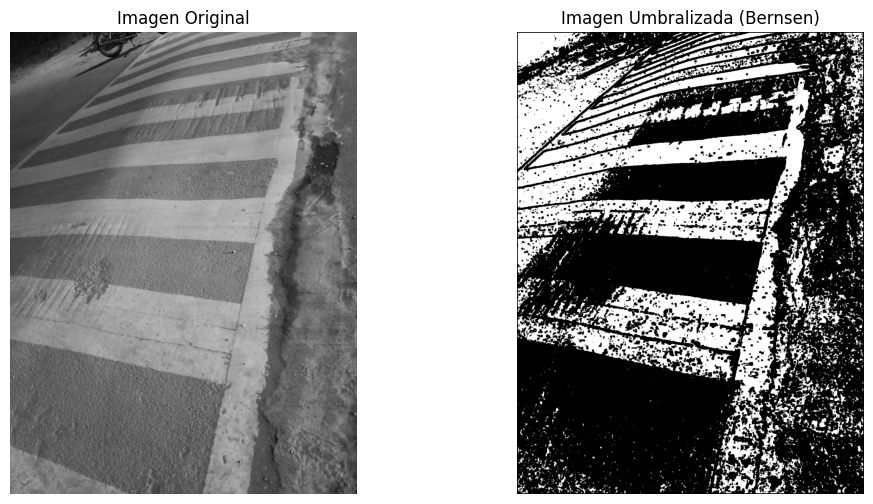

In [ ]:
def umbralizacion_bernsen(imagen, ventana_size, contraste_min):
    alto, ancho = imagen.shape
    resultado = np.zeros_like(imagen, dtype=np.uint8)

    ventana_radius = ventana_size // 2

    for x in range(ventana_radius, alto - ventana_radius):
        for y in range(ventana_radius, ancho - ventana_radius):
            ventana = imagen[x - ventana_radius:x + ventana_radius + 1,
                             y - ventana_radius:y + ventana_radius + 1]
            min_pixel = np.min(ventana)
            max_pixel = np.max(ventana)

            if max_pixel - min_pixel <= contraste_min:
                resultado[x, y] = 255
            else:
                resultado[x, y] = 0

    return resultado

# Cargar una imagen en escala de grises (reemplaza con tu imagen)

imagen = Image.open(foto1).convert("L")
imagen = np.array(imagen)

# Aplicar umbralización de Bernsen
ventana_size = 15  # Tamaño de la ventana de vecindario
contraste_min = 20  # Umbral de contraste mínimo
imagen_umbralizada = umbralizacion_bernsen(imagen, ventana_size, contraste_min)

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Imagen Umbralizada (Bernsen)')
plt.axis('off')

plt.show()